## Creating Machine Learning Models with Scikit-learn

### Introducing Scikit-learn
- Python library that provides ready-to-use implementations of several pupolar machine learning algorithms such as linear regression, logistic regression,support vector machines, clustering, and random forests.
- Provides tools to split datasets into test-train subsets, implement k-fold cross validation, evaluate model performance using popular metrics, and detect outliers, and include algorithms to aid with feature selection.
- Scikit-learn builds upon several other libraries such as NumPy, Pandas, ad Matplotlib, and at its core is focused in model building and - evaluation tasks, and not tasks such as data loading and visualization.
- Scikit-learn is the reason for the rise in the number of real-world applications of machine learning.

### Creating a Training and Test Dataset
- Building a machine learning model involves creating a computer program that can draw inferences from the features during the training phase and then testing the quality of the model by making predictions.
- Common practice: set aside some of the labelled training data before the model-building phase and testing the model using this data that the model has not previously encountered.
- The performance of the model on this unseen data is used to determine if the model is good enough, or if improvements are needed.
- The benefit of having a separate training and testing set  is that it ensures the model has not memorized the training examples(a phenomena known as overfitting).
- In the case of supervised learning, both the training and testing sets are labeled and the original dataset must evenly be shuffled before the subsets are created.

- Scikit-learn provides a function called train_test_split() in the model_selection submodule that can be used to split a Pandas Dataframe into two dataframes, one for model building and the other for model evaluation.

#### The train_test_split(parameters:default values)
- test_size: value can be an integer or floating-point number.
  - When the value is an integer, it specifies the number of elements that should be retained for the test set.
  - When the value is a floating-point number, it specifies the percentage of the original dataset to include in the test set.
- random_state: This is an integer value used to seed the random-number generator used to shuffle the samples.

#### The Output of the train_test_split(list of four arrays)
- The first item of the list is an array that contains the training set features.
- The second item of the list is an array that contains the test set features.
- The third item of the list is an array that contains the training set labels(target variable).
- The fourth item of the list is an array that contains the test set labels.

### Using the function to split the Iris flowers dataset into training and test set.
- 25% is reserved for the test set

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

# load iris dataset

from sklearn.datasets import load_iris
iris_dataset = load_iris()
df_iris_features = pd.DataFrame(data= iris_dataset.data, 
                               columns=iris_dataset.feature_names)

df_iris_target = pd.DataFrame(data= iris_dataset.target,
                             columns=['class'])

# split the iris dataset
iris_split = train_test_split(df_iris_features, df_iris_target, test_size=0.25, random_state=17)

df_iris_features_train = iris_split[0]
df_iris_features_test = iris_split[1]
df_iris_target_train = iris_split[2]
df_iris_target_test = iris_split[3]

In [15]:
iris_split = train_test_split(df_iris_features, df_iris_target, test_size=0.25, random_state=17)
iris_split[0].shape

(112, 4)

In [17]:
iris_split[1].shape

(38, 4)

In [19]:
iris_split[2].shape

(112, 1)

In [25]:
iris_split[3].shape

(38, 1)

# inspecting the size of the training and test dataset

df_iris_features.shape, df_iris_target.shape

In [28]:
df_iris_features_train.shape, df_iris_target_train.shape

((112, 4), (112, 1))

In [30]:
df_iris_features_test.shape, df_iris_target_test.shape

((38, 4), (38, 1))

In [32]:
df_iris_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
df_iris_features_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3
34,4.9,3.1,1.5,0.2
95,5.7,3.0,4.2,1.2
75,6.6,3.0,4.4,1.4
48,5.3,3.7,1.5,0.2


- The default behavior of the train_test_split() function is to shuffle the data, then determine the boundary observation where the training set should end and prepare two datasets by splitting at this boundary position.
- The train_test_split() has a parameter called stratify used to achieve a stratified split, maintaining the proportions of categorical observations before and after the split.

In [51]:
# iris dataset, with stratified sampling

iris_split_strat = train_test_split(df_iris_features, df_iris_target,
                                   test_size=0.25,
                                   random_state=17,
                                   stratify=df_iris_target)

df_iris_features_train2 = iris_split_strat[0]
df_iris_features_test2 = iris_split_strat[1]
df_iris_target_train2 = iris_split_strat[2]
df_iris_target_test2 = iris_split_strat[3]

In [57]:
df_iris_features_train2.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,6.5,2.8,4.6,1.5
50,7.0,3.2,4.7,1.4
82,5.8,2.7,3.9,1.2
110,6.5,3.2,5.1,2.0
14,5.8,4.0,1.2,0.2


In [59]:
df_iris_features_test2.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
76,6.8,2.8,4.8,1.4
77,6.7,3.0,5.0,1.7
121,5.6,2.8,4.9,2.0
147,6.5,3.0,5.2,2.0
85,6.0,3.4,4.5,1.6


- Using Pandas plotting functions to create a bar chart  of the distribution of categories in the original dataset, the unstratified training set, and the stratisfied training set.

<Axes: title={'center': 'df_iris_target_train2'}, xlabel='class'>

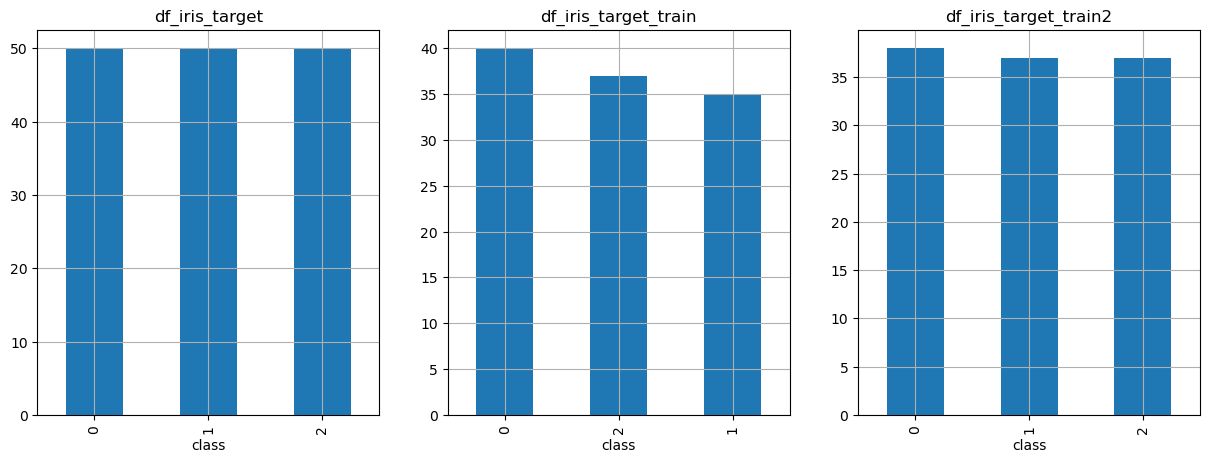

In [71]:
# visualize the distribution of target values in the 
# original dataset and the training sets created by train_test_split
# function, with and without stratisfication.
# use Pandas dataframe functions to plot a bar chart of the 'Embarked' attribute


import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('df_iris_target')
df_iris_target['class'].value_counts(dropna=False).plot.bar(grid=True,
                                                           ax=axes[0])
axes[1].set_title('df_iris_target_train')
df_iris_target_train['class'].value_counts(dropna=False).plot.bar(grid=True,
                                                                ax=axes[1])
axes[2].set_title('df_iris_target_train2')
df_iris_target_train2['class'].value_counts(dropna=False).plot.bar(grid=True,
                                                                  ax=axes[2])


- The distribution of target values is identical between the three categories of iris flowers dataset.
- This is seen in the first histogram where with each category having 50 values.

### Illustrating the better use of stratified sampling

- We load the toy version of the UCI ML wines dataset.
- we plot the difference between stratified and unstratified splits.
- The UCI ML wines dataset is a popular dataset used by beginners for multiclass classification problems.
- It contains a number of numeric features that contain the results of a chemical analysis on wines grown in four different regions of Italy and a categorical target that indicates the overal quality of the wine.



<Axes: title={'center': 'df_wine_target_train2'}, xlabel='class'>

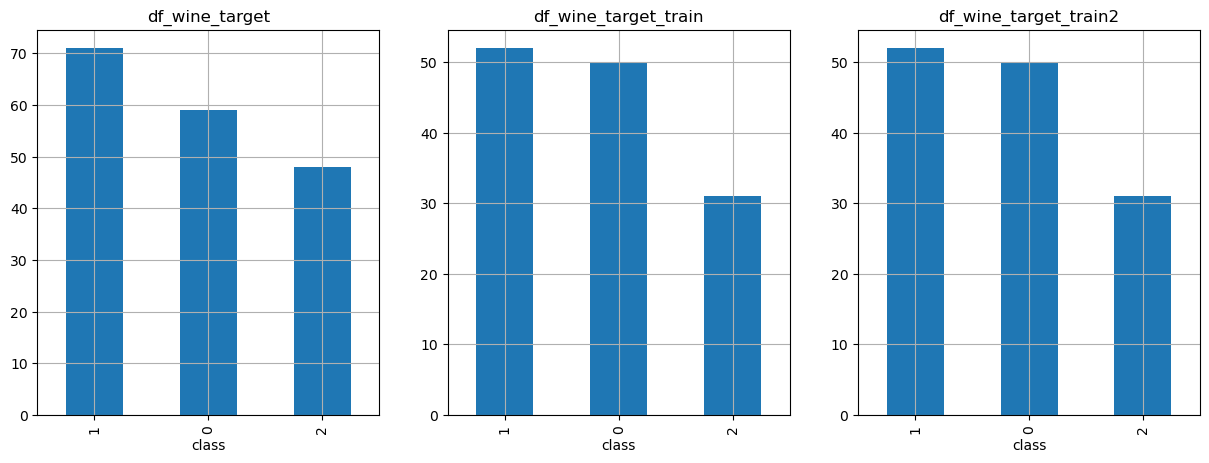

In [77]:
#load the UCI ML Wines dataset

from sklearn.datasets import load_wine
wine_dataset = load_wine()

df_wine_features = pd.DataFrame(data=wine_dataset.data,
                               columns=wine_dataset.feature_names)
df_wine_target = pd.DataFrame(data=wine_dataset.target,
                             columns=['class'])


# wine dataset

wines_split = train_test_split(df_wine_features, df_wine_target, 
                              test_size=0.25,
                              random_state=17)

df_wine_features_train = wines_split[0]
df_wine_features_test = wines_split[1]
df_wine_target_train = wines_split[2]
df_wine_target_test = wines_split[3]

# wines dataset with stratified sampling
wines_split_strat = train_test_split(df_wine_features, df_wine_target,
                                    test_size=0.25,
                                    random_state=17,
                                    stratify=df_wine_target)

df_wine_features_train2 = wines_split_strat[0]
df_wine_features_test2 = wines_split_strat[1]
df_wine_target_train2 = wines_split_strat[2]
df_wine_target_test2 = wines_split_strat[3]


# visualize the distribution of target values in the
# original wines dataset and the training sets created by the train_test_split() function
# with or without stratification
# use Pandas DataFrame functions to plot a bar chart of an 'Embarked' attribute


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_title('df_wine_target')
df_wine_target['class'].value_counts(dropna=False).plot.bar(grid=True,
                                                           ax=axes[0])
axes[1].set_title('df_wine_target_train')
df_wine_target_train['class'].value_counts(dropna=False).plot.bar(grid=True,
                                                                 ax=axes[1])
axes[2].set_title('df_wine_target_train2')
df_wine_target_train['class'].value_counts(dropna=False).plot.bar(grid=True,
                                                                 ax=axes[2])

## K-Fold Cross Validation

- The main drawback with the idea of splitting the training dataset into a training and validation set is that it is possible for the samples in the training set to exhibit characteristics that may not be found in any of the samples in the test set.
- While shuffling the data can help mitigate this, the extent of the mitigation depends on various factors such as the size of the original dataset, and the proportion of samples that exhibit a particular characteristics.
- The solution to avoidingto create a model that is susceptible to characteristics only found in the training set is embodied in a technique called k-fold cross validation.

### How k-fold cross validation works at a high level
- Choose a value k
- Shuffle the data
- Split the data into k equal subsets
- For each value of k:
      - Train a model that uses the kth subset as the test set and the samples of the k-1 subsets as the training set.
      - Record the performance of the model when making predictions on the kth subset.
- Compute the mean performance of the individual models to work out the overall performance.

- K-fold cross validation help minimize the possibility of the model picking up on unexpected bias in the training set.
- The idea behind k-fold cross validation is to shuffle the entire dataset randomly and divide it into a number of smaller sets(known as folds) and train multiple models(or the same model multiple times).
- During each training and evaluation cycle, on of the folds will be held out as the test set and the remaining will make the training set.
- if k=1, k-fold approach becomes similar to the train_test_split method.
- if k=n, the number of samples in the training set, then in effect the test set contains only one sample, and each sample will get to be part of the test set during one of the iterations.
- This technique is also known as leave_one_out cross validation.
- Scikit-learn provides a class called KFold as part of the model-building module used to create the folds and enumerate through the folds.
- The constructor of the KFold class takes three parameters:
    - n_splits: an integer that represents the number of folds required.
    - shuffle: an optional boolean value that indicates whether the data should be shuffled before the folds are created.
    - random_state: an optional integer used to seed the random-number generator used to shuffle the data.
- The K-Fold class provides two methods:
    - get_n_splits() : returns the number of folds
    - split(): gets the indeces of the training and test set members of each fold.

In [82]:
# perform 10-fold split on the iris dataset

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
fold_number=1
for train_indices, test_indices in kf.split(df_iris_features):

    print("Fold number:", fold_number)
    print("Training indices:", train_indices)
    print("Testing indices:", test_indices)
    fold_number = fold_number + 1
    df_iris_features_train = df_iris_features.iloc[train_index]
    df_iris_target_train = d_iris_target.iloc[train_index]
    df_iris_features_test = df_iris_features.iloc[test_index]
    df_iris_target_test = df_iris_target.iloc[test_index]

Fold number: 1
Training indices: [  0   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  23  24  25  26  27  28  29  31  32  33  34  35  36  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96  97  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 115 117 118 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 138 139
 140 141 143 144 145 146 147 148 149]
Testing indices: [  1   5  22  30  37  59  78  79  95  98 114 116 119 137 142]


NameError: name 'train_index' is not defined